# Import

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* pandas (imported as pd): A library for data manipulation and analysis. It provides data structures and functions to efficiently handle structured data.
* numpy (imported as np): A library for numerical computations in Python. It provides powerful tools for working with arrays and mathematical operations.
* matplotlib.pyplot (imported as plt): A plotting library that provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.
* seaborn (imported as sns): A higher-level interface to Matplotlib that allows for easier creation of statistical graphics. It provides a variety of built-in themes and color palettes.

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

- train_test_split: A function from sklearn.model_selection module that splits data into random train and test subsets. It's commonly used for model evaluation and validation.
- SVC (Support Vector Classifier): An implementation of the Support Vector Machine algorithm for classification tasks from sklearn.svm. It's a powerful and versatile classifier that works well on various types of data.
- XGBClassifier: An implementation of the XGBoost algorithm for classification tasks. XGBoost is an efficient gradient boosting framework that has gained popularity due to its high performance in machine learning competitions.
- accuracy_score: A function from sklearn.metrics module that computes the accuracy classification score. It compares the predicted labels with the true labels and returns the fraction of correctly classified samples.
- roc_auc_score: A function from sklearn.metrics module that computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC). It measures the performance of a classification model by evaluating the trade-off between true positive rate and false positive rate.
- roc_curve: A function from sklearn.metrics module that computes the Receiver Operating Characteristic (ROC) curve. It's used to visualize the performance of a binary classification model across different classification thresholds.
- auc: A function from sklearn.metrics module that computes the Area Under the Curve (AUC) for a given ROC curve. It provides a summarized measure of the model's performance.
- preprocessing from sklearn: A module that provides various data preprocessing techniques, such as scaling and encoding, to prepare the data before feeding it to a machine learning model.
- RandomForestClassifier: An implementation of the random forest algorithm for classification tasks from sklearn.ensemble. Random forests are an ensemble learning method that combines multiple decision trees to make predictions.
- MinMaxScaler: A class from sklearn.preprocessing module that performs feature scaling by scaling the data to a specific range. It's commonly used to normalize numerical features within a specific range.

# Reading train and test data 

In [291]:
train = pd.read_csv('../input/uci-adult-census-data-dataset/adult_train.csv')
test = pd.read_csv('../input/uci-adult-census-data-dataset/adult_test.csv')

In [292]:
train.head(10)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [293]:
test.head(10)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.


In the Adult Census Dataset, the target column consists of labels indicating whether the salary is (less than)-(equal to) 50K or not. This can be considered a binary classification problem with Target column being the independent variable

In [294]:
train.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [295]:
train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [296]:
train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

**Numerical Columns Distribution**

In [297]:
train.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


generates summary statistics for the numerical columns in the training dataset

**Missing Value Percentage**

In [298]:
(train.isnull().mean()*100).round(3)

Age               0.000
Workclass         5.639
fnlwgt            0.000
Education         0.000
Education_Num     0.000
Martial_Status    0.000
Occupation        5.660
Relationship      0.000
Race              0.000
Sex               0.000
Capital_Gain      0.000
Capital_Loss      0.000
Hours_per_week    0.000
Country           1.790
Target            0.000
dtype: float64

calculates the percentage of missing values in each column of the training dataset

# EDA

In [299]:
selected_features = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country']

numeric_features = ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']
categorical_features = ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [300]:
def plot_dataframe_features(df):
    for column in df.columns:
        column_data = df[column]
        if column_data.dtype == 'object':
            # Categorical feature
            plt.figure()
            sns.countplot(data=df, x=column)
            plt.title(f'{column} (Categorical)')
            plt.show()
        else:
            # Numeric feature
            plt.figure()
            plt.hist(column_data)
            plt.title(f'{column} (Numeric)')
            plt.show()

This function allows you to visualize the distribution of categorical features using count plots and the distribution of numeric features using histograms

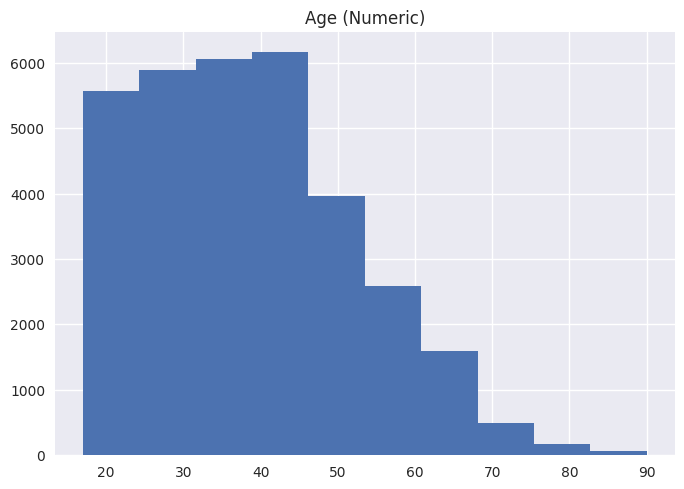

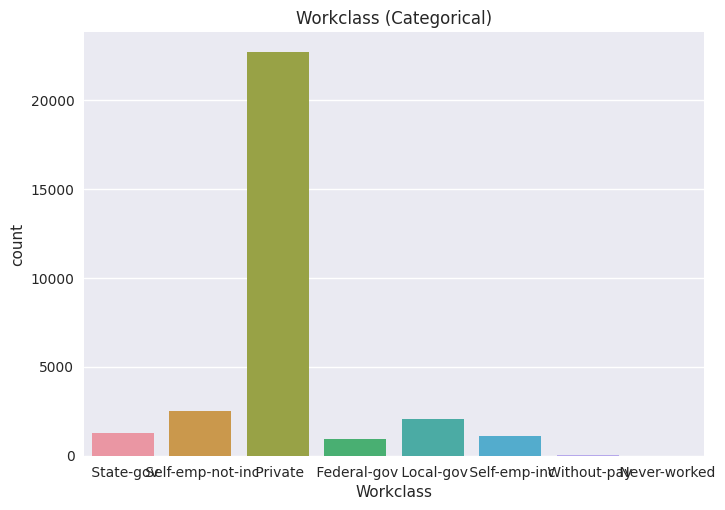

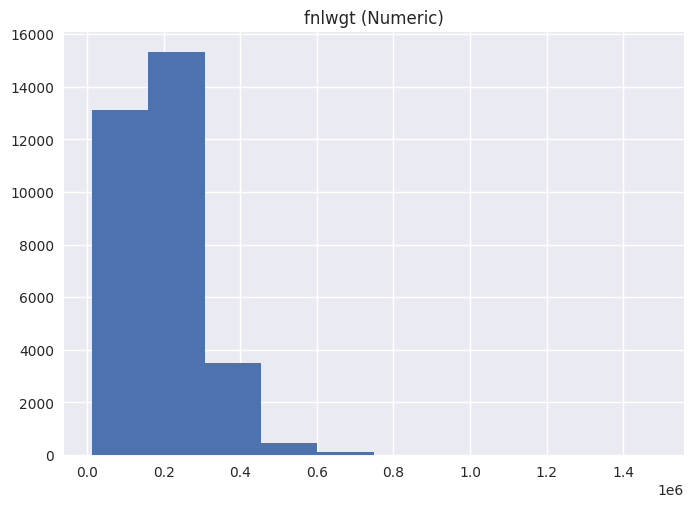

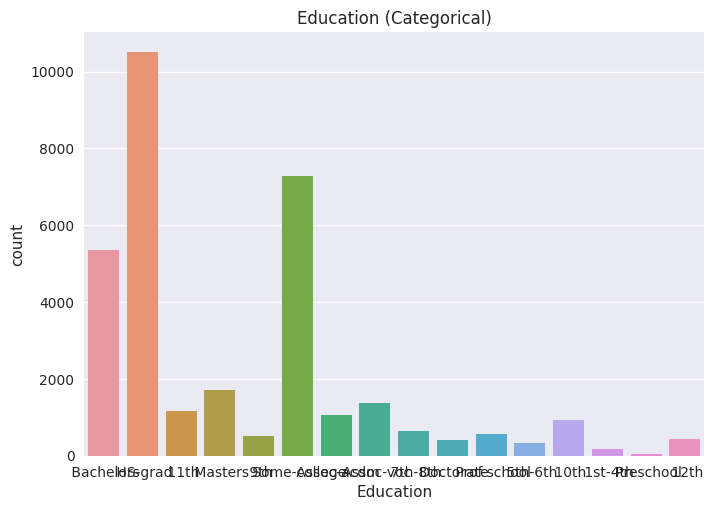

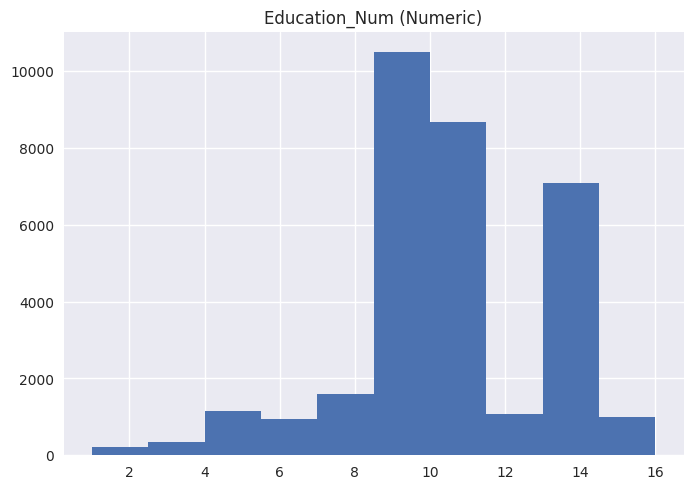

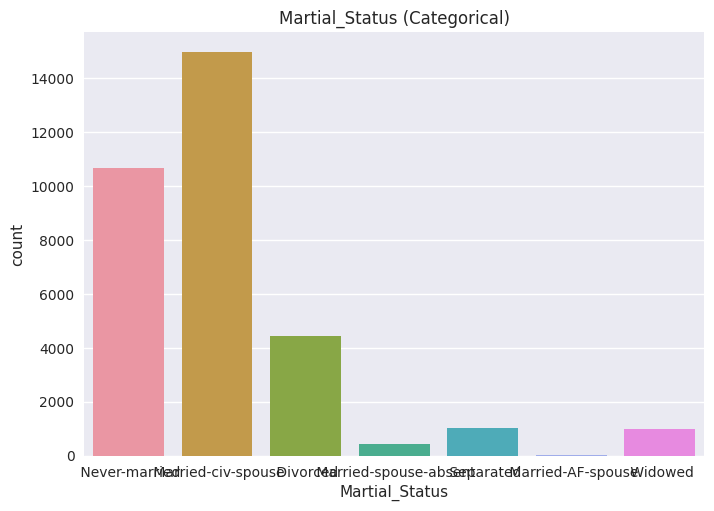

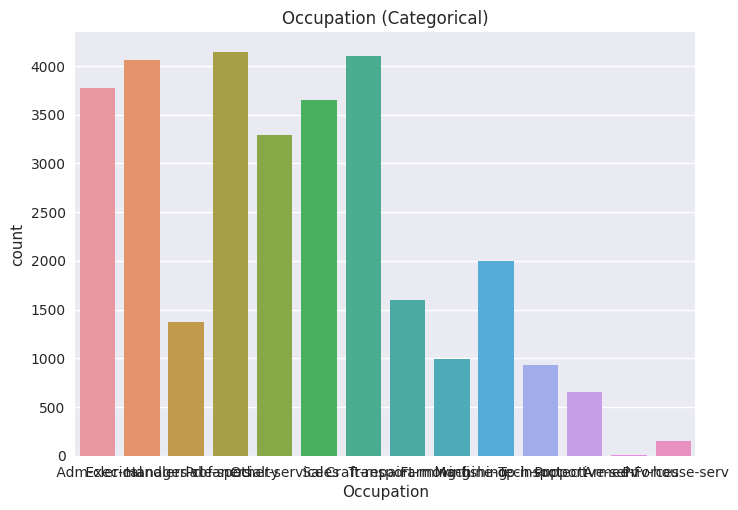

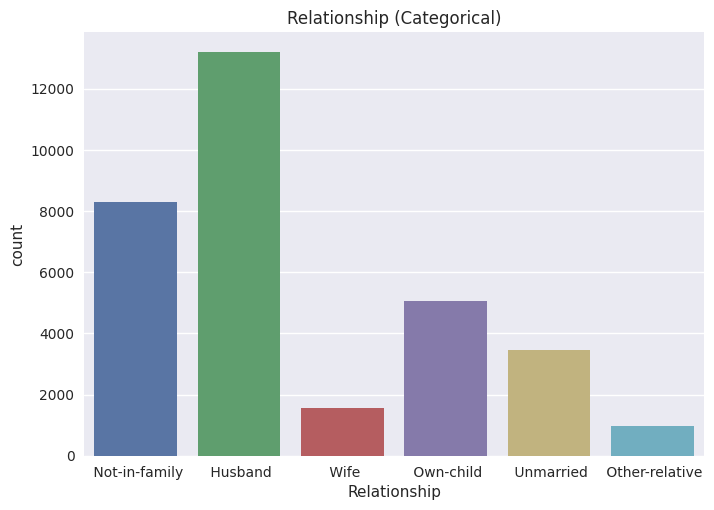

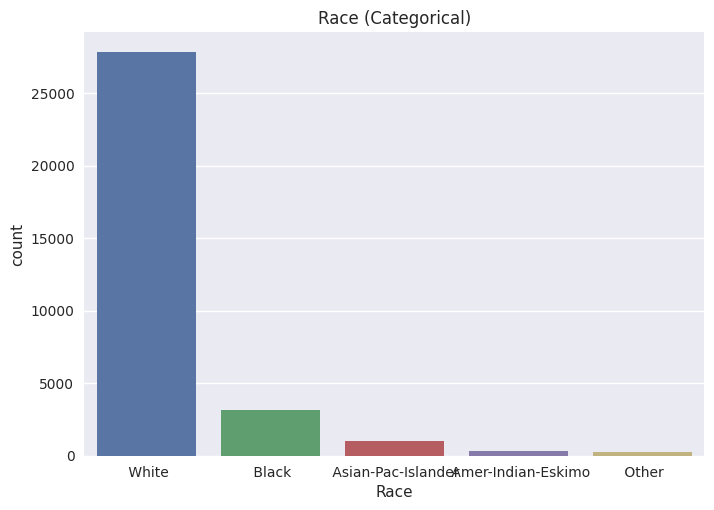

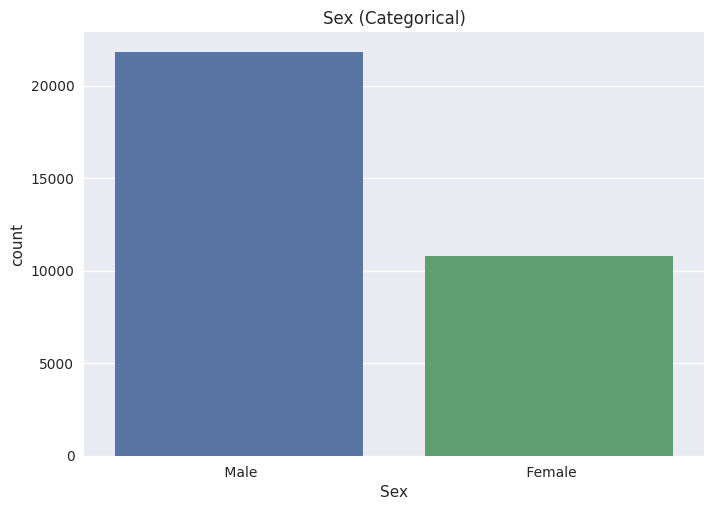

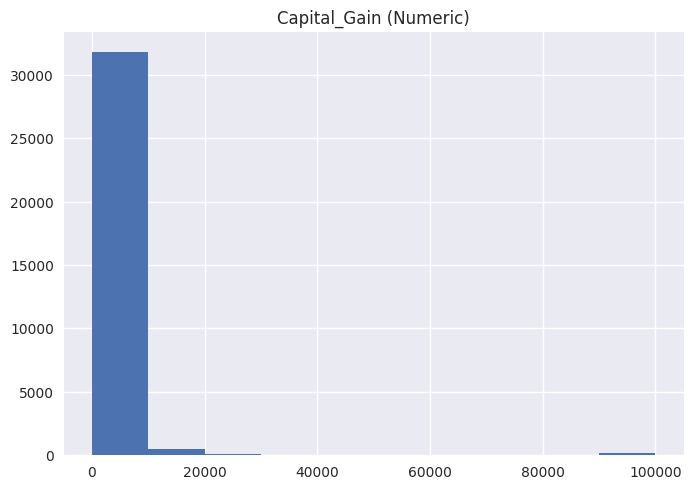

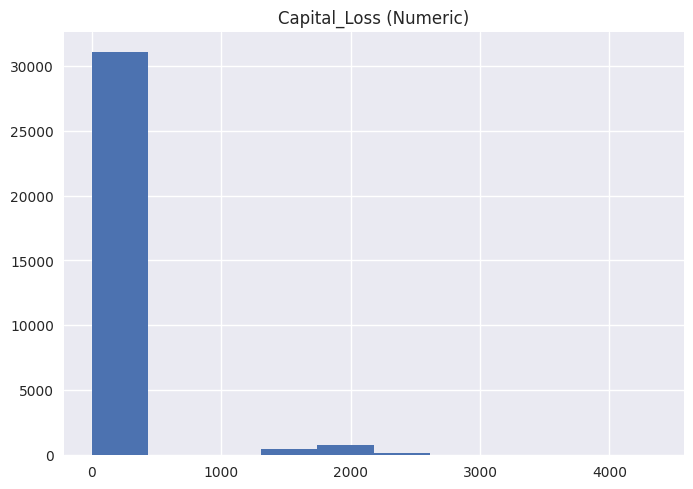

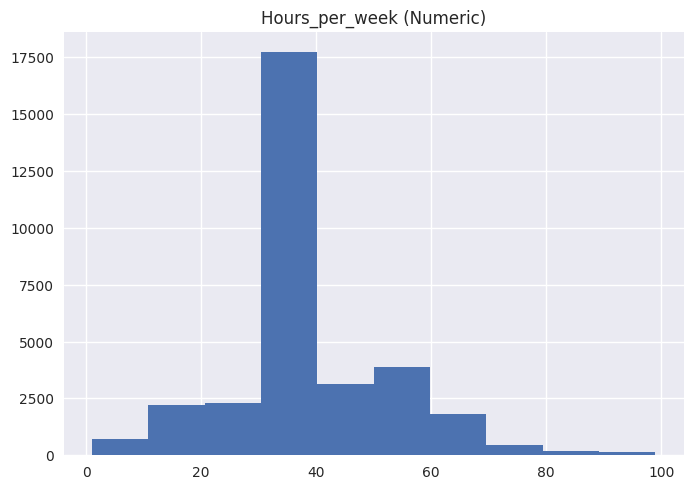

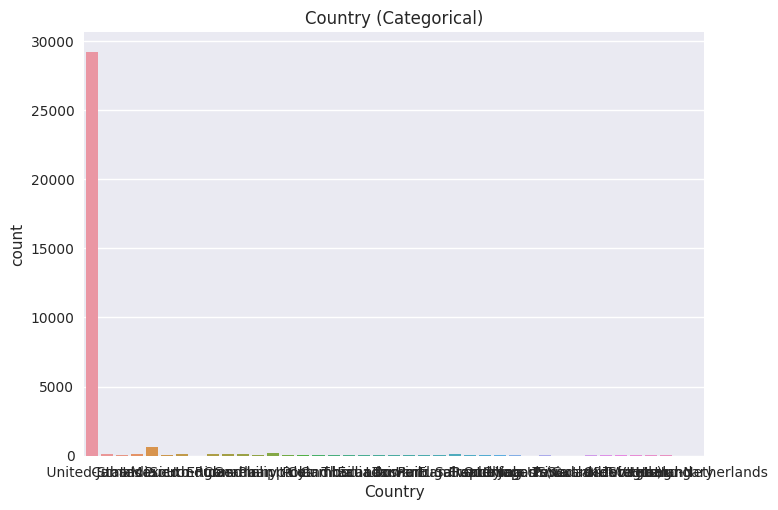

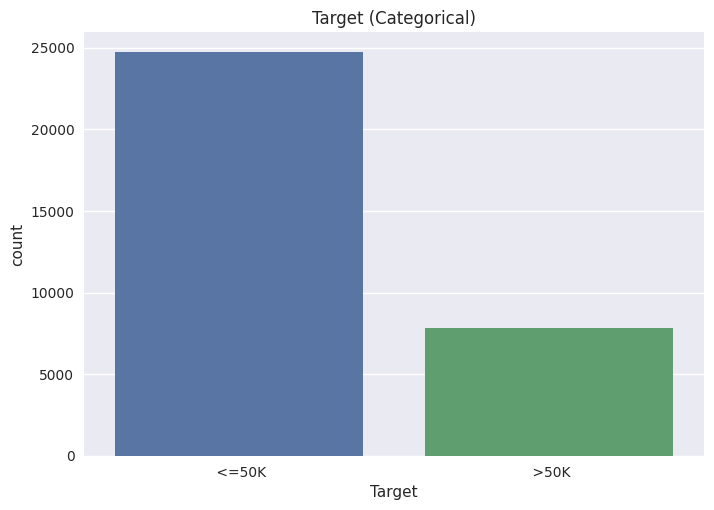

In [301]:
plot_dataframe_features(train)

<Axes: xlabel='Sex', ylabel='count'>

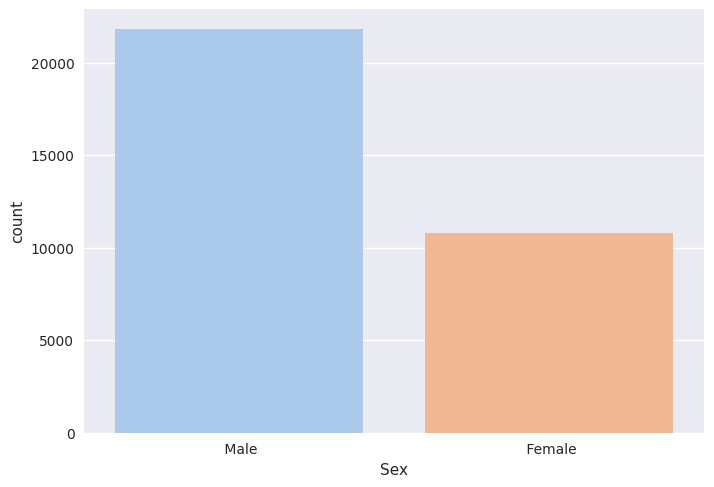

In [302]:
sns.countplot(x = 'Sex',data=train,palette='pastel')

<Axes: xlabel='Target', ylabel='count'>

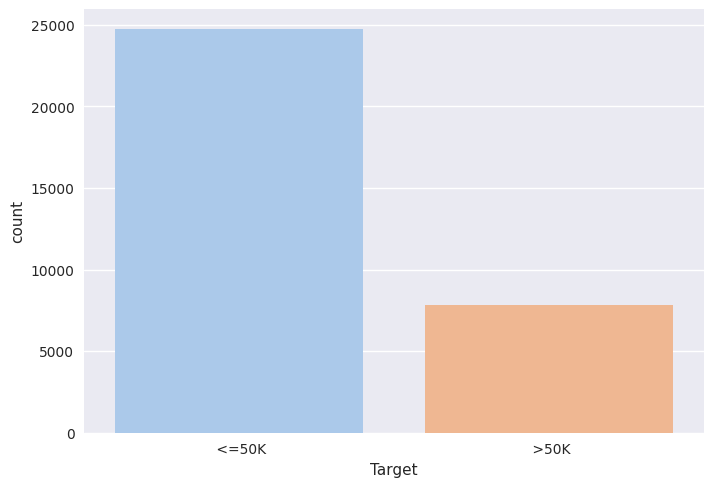

In [303]:
sns.countplot(x = 'Target',data=train,palette='pastel')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

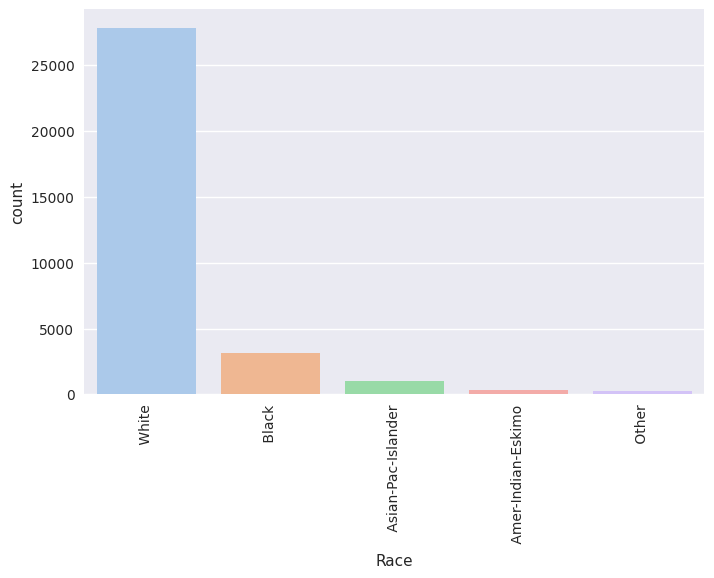

In [304]:
plt.figure(figsize=(8,5),)
sns.countplot(x = 'Race',data=train,palette='pastel')
plt.xticks(rotation=90)

<Axes: xlabel='Workclass', ylabel='count'>

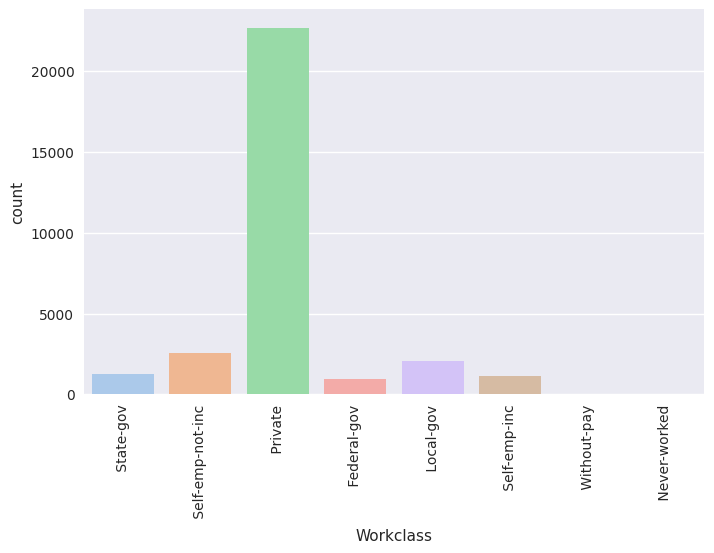

In [305]:
plt.figure(figsize=(8,5),)
plt.xticks(rotation=90)
sns.countplot(x = 'Workclass',data=train,palette='pastel')

<Axes: xlabel='Martial_Status', ylabel='count'>

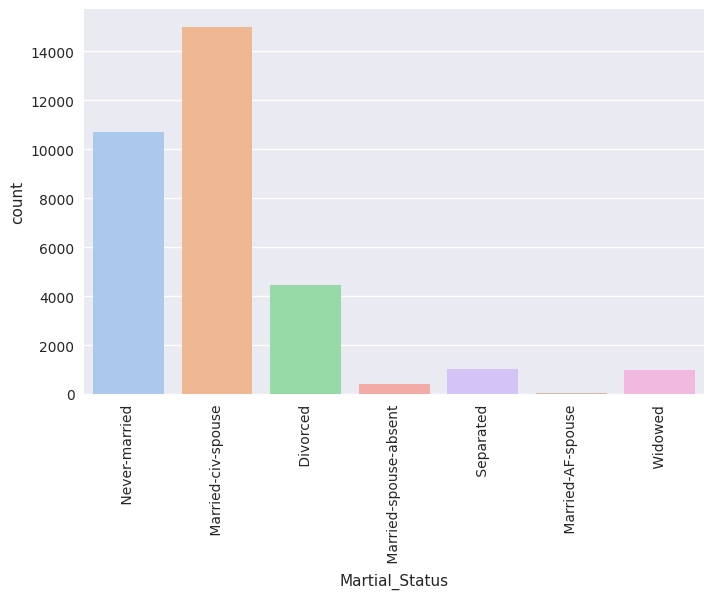

In [306]:
plt.figure(figsize=(8,5),)
plt.xticks(rotation=90)
sns.countplot(x = 'Martial_Status',data=train,palette='pastel')

<Axes: xlabel='Target', ylabel='Hours_per_week'>

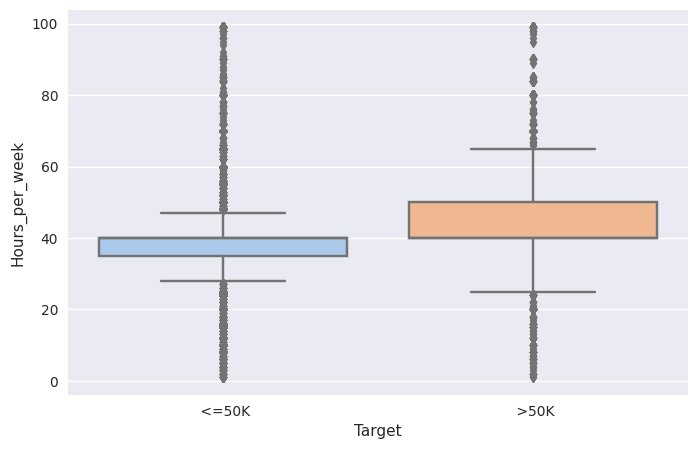

In [307]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target',y='Hours_per_week',data=train, palette='pastel')

<Axes: xlabel='Target', ylabel='Age'>

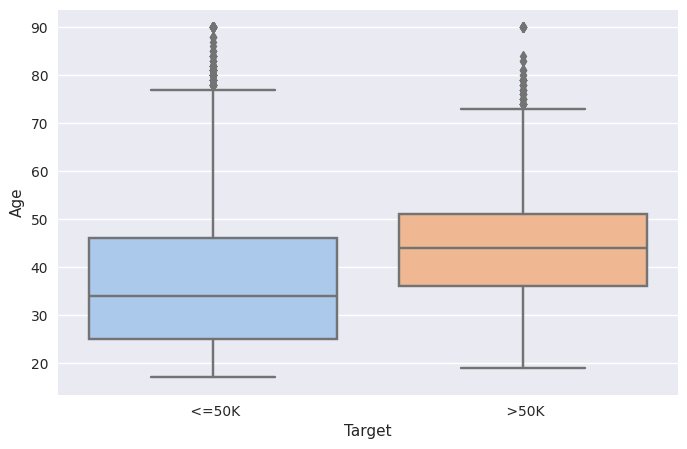

In [308]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target',y='Age',data=train, palette='pastel')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

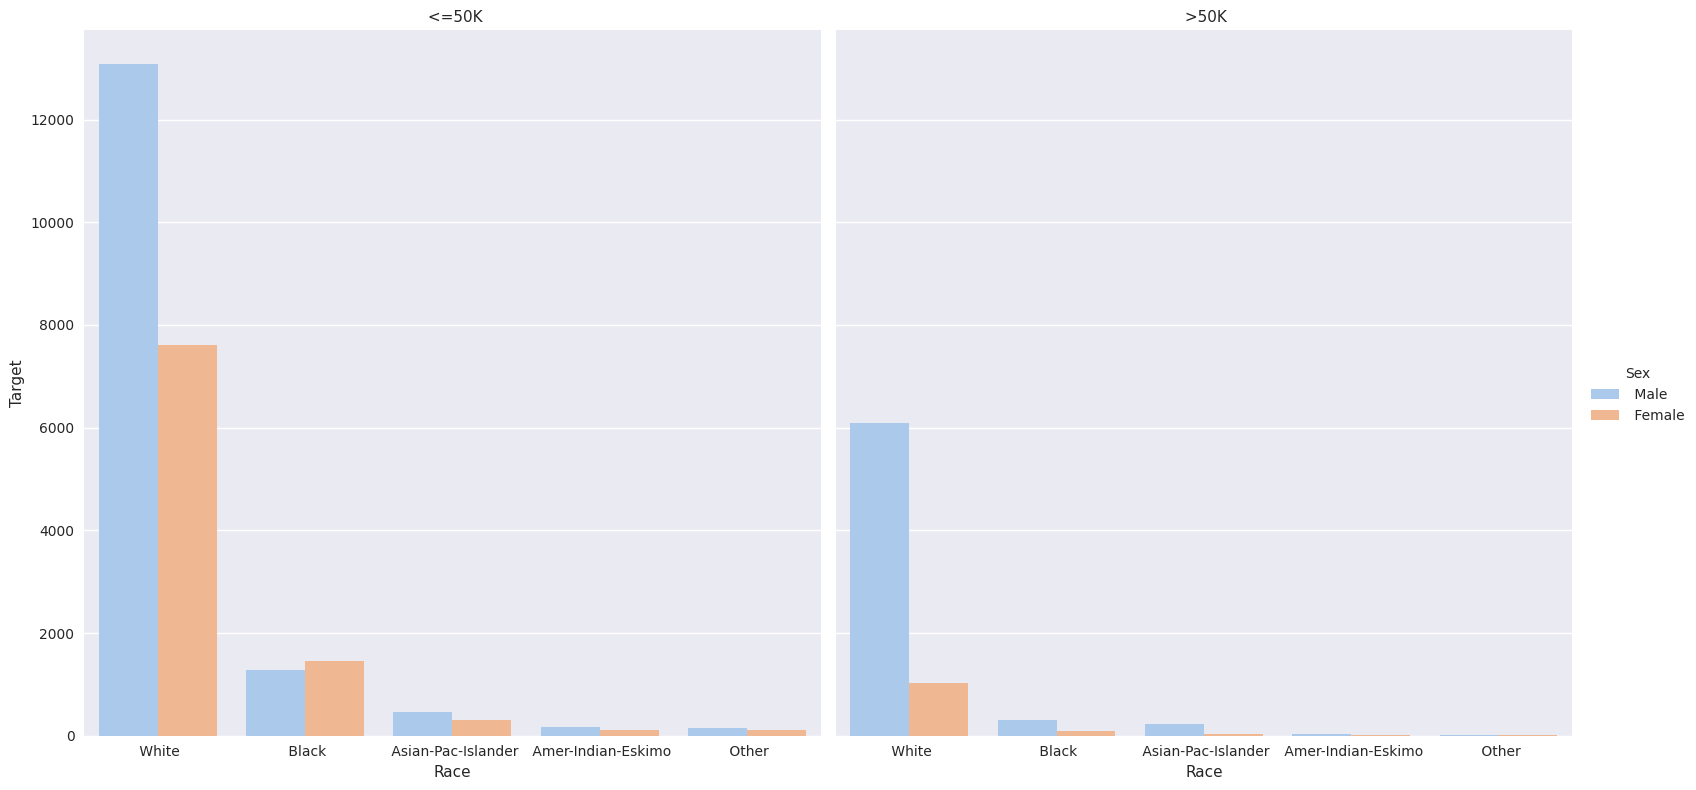

In [309]:
plt.figure(figsize=(20,10))
g = sns.catplot(x='Race',hue='Sex', col = 'Target', data=train, kind='count', palette='pastel',height=8)
g.set_axis_labels("Race", "Target").set_titles("{col_name}")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1500 with 0 Axes>

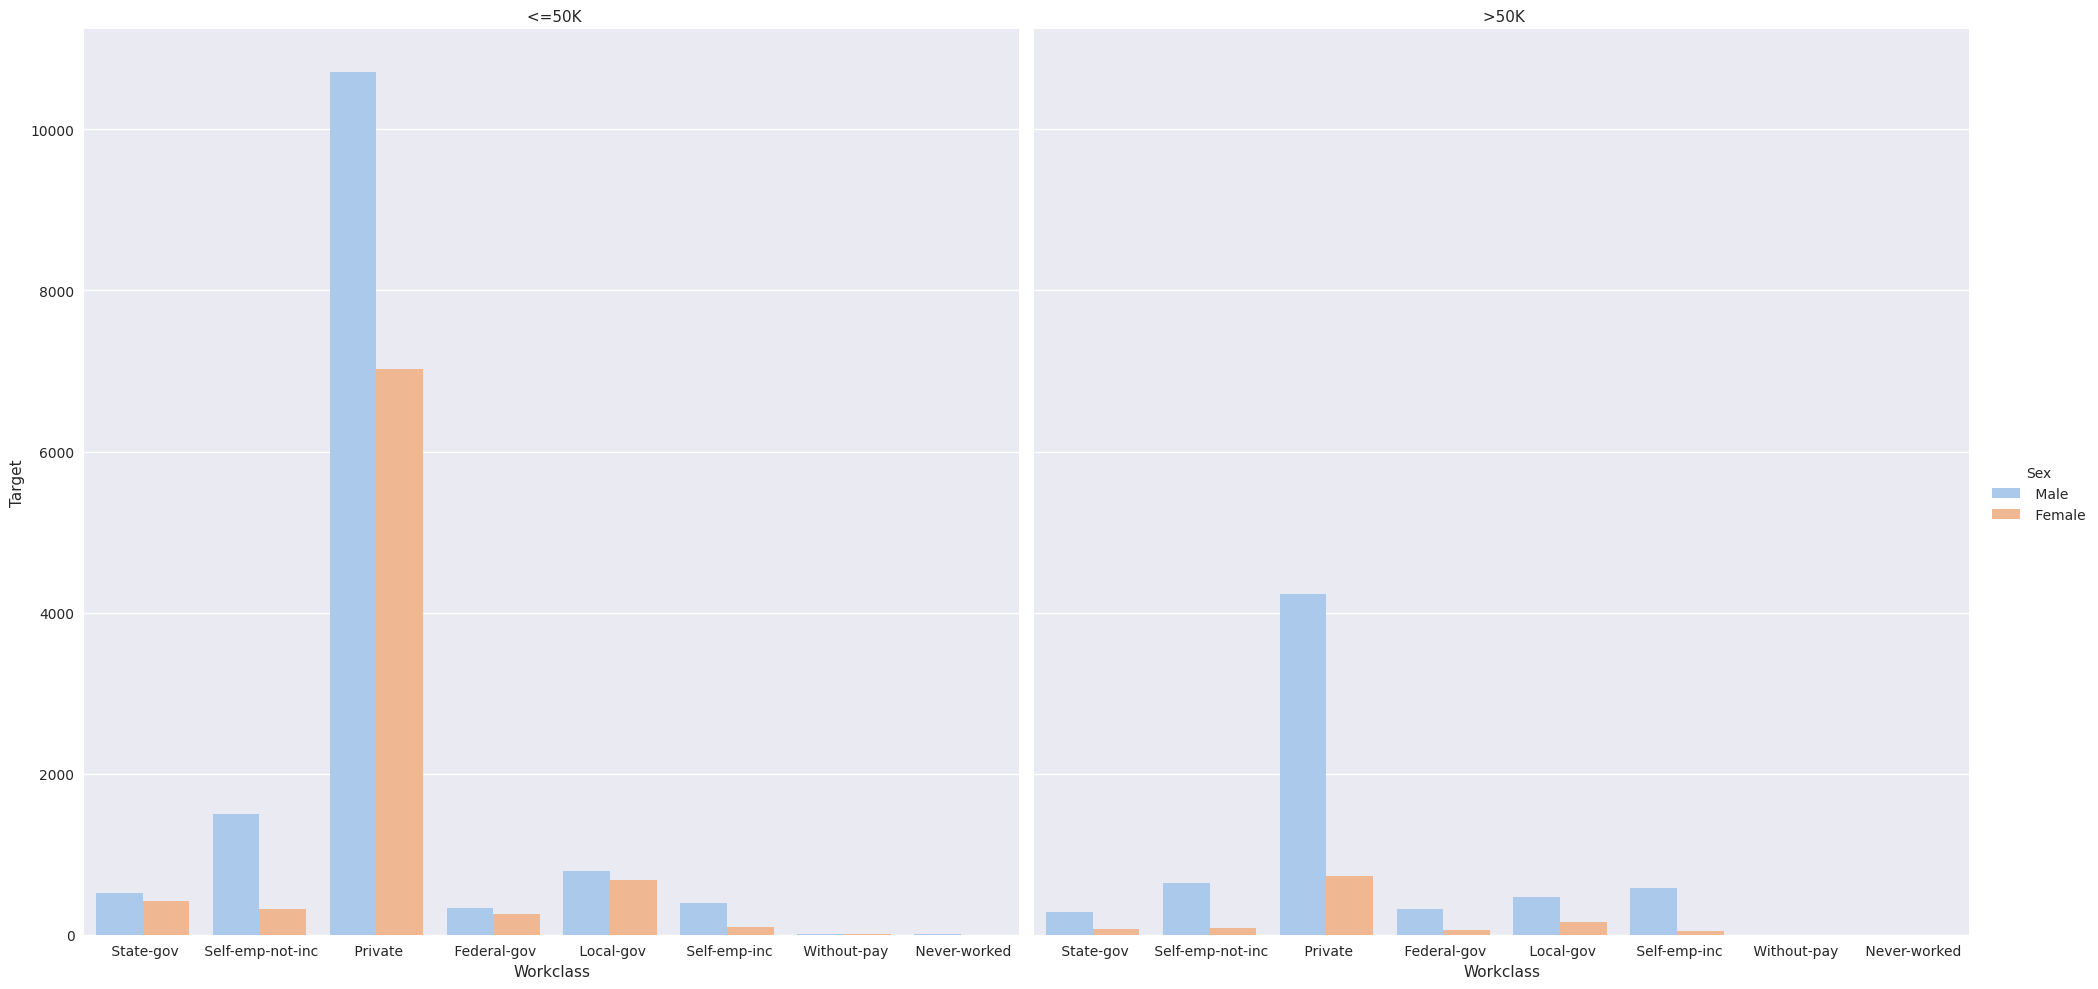

In [310]:
plt.figure(figsize=(25,15))
g = sns.catplot(x='Workclass',hue='Sex', col = 'Target', data=train, kind='count', palette='pastel',height=10)
g.set_axis_labels("Workclass", "Target").set_titles("{col_name}")

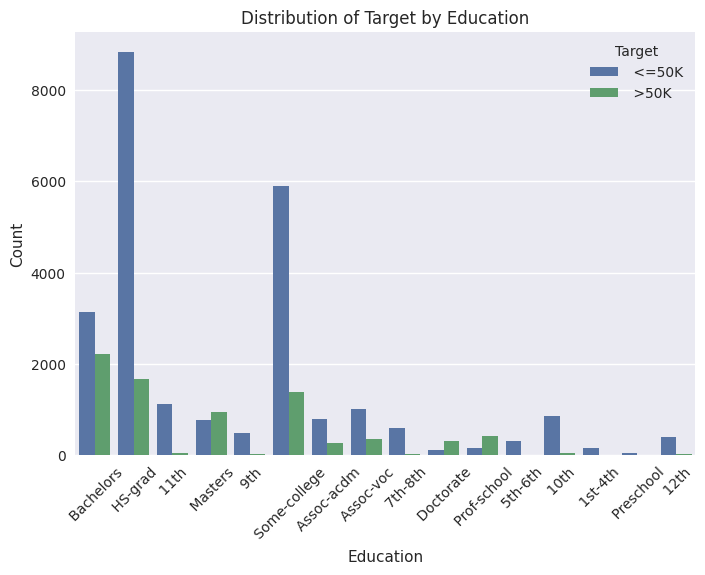

In [311]:
sns.countplot(x='Education', hue='Target', data=train)
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Target by Education')
plt.show()

In [312]:
pd.crosstab(train.Race, train.Target, margins=True).style.background_gradient(cmap='autumn_r')

Target,<=50K,>50K,All
Race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20699,7117,27816
All,24720,7841,32561


generates a cross-tabulation table between the "Race" and "Target" columns and applies a background gradient to visualize the distribution of values in the table. The gradient helps highlight patterns or discrepancies in the data.

# Data Preprocessing

In [313]:
label_encoder = preprocessing.LabelEncoder()
train['Target']= label_encoder.fit_transform(train['Target'])

In [314]:
train.tail(3)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [315]:
# Assuming 'df' is your DataFrame containing the data
train['age_group'] = pd.cut(train['Age'], bins=[0, 30, 50, float('inf')], labels=['<30', '30-50', '50+'])

The train DataFrame will have a new column called "age_group" that categorizes the ages into the specified groups ("<30", "30-50", "50+").

In [316]:
train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,30-50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,30-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,30-50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,50+
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,<30


In [317]:
train = train.drop('Age', axis = 1)

In [318]:
train = train.dropna()

In [319]:
train_dummy = pd.get_dummies(train,columns = ['Martial_Status','Occupation','Relationship','Workclass','Country','Race','Sex'],drop_first=False)

In [320]:
train_dummy

,fnlwgt,Education,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,age_group,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,...,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,77516,Bachelors,13,2174,0,40,0,30-50,False,False,...,True,False,False,False,False,False,False,True,False,True
1,83311,Bachelors,13,0,0,13,0,30-50,False,False,...,True,False,False,False,False,False,False,True,False,True
2,215646,HS-grad,9,0,0,40,0,30-50,True,False,...,True,False,False,False,False,False,False,True,False,True
3,234721,11th,7,0,0,40,0,50+,False,False,...,True,False,False,False,False,True,False,False,False,True
4,338409,Bachelors,13,0,0,40,0,<30,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,257302,Assoc-acdm,12,0,0,38,0,<30,False,False,...,True,False,False,False,False,False,False,True,True,False
32557,154374,HS-grad,9,0,0,40,1,30-50,False,False,...,True,False,False,False,False,False,False,True,False,True
32558,151910,HS-grad,9,0,0,40,0,50+,False,False,...,True,False,False,False,False,False,False,True,True,False
32559,201490,HS-grad,9,0,0,20,0,<30,False,False,...,True,False,False,False,False,False,False,True,False,True


In [321]:
unique_educations = train_dummy['Education'].unique()
print(unique_educations)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


In [322]:
education_importance = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
}

In [323]:
train_dummy['Education_Importance'] = train_dummy['Education'].map(education_importance)

The train_dummy DataFrame will have a new column called "Education_Importance" that represents the importance values associated with each education level.

In [324]:
train_dummy.head()

,fnlwgt,Education,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,age_group,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,...,Country_ Vietnam,Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Education_Importance
0,77516,Bachelors,13,2174,0,40,0,30-50,False,False,...,False,False,False,False,False,False,True,False,True,NaN
1,83311,Bachelors,13,0,0,13,0,30-50,False,False,...,False,False,False,False,False,False,True,False,True,NaN
2,215646,HS-grad,9,0,0,40,0,30-50,True,False,...,False,False,False,False,False,False,True,False,True,NaN
3,234721,11th,7,0,0,40,0,50+,False,False,...,False,False,False,False,True,False,False,False,True,NaN
4,338409,Bachelors,13,0,0,40,0,<30,False,False,...,False,False,False,False,True,False,False,True,False,NaN


In [325]:
train_dummy = train_dummy.drop(['Education', 'Education_Importance'], axis=1)

In [326]:
train_dummy.head()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,age_group,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,Martial_Status_ Married-civ-spouse,...,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,77516,13,2174,0,40,0,30-50,False,False,False,...,True,False,False,False,False,False,False,True,False,True
1,83311,13,0,0,13,0,30-50,False,False,True,...,True,False,False,False,False,False,False,True,False,True
2,215646,9,0,0,40,0,30-50,True,False,False,...,True,False,False,False,False,False,False,True,False,True
3,234721,7,0,0,40,0,50+,False,False,True,...,True,False,False,False,False,True,False,False,False,True
4,338409,13,0,0,40,0,<30,False,False,True,...,False,False,False,False,False,True,False,False,True,False


In [327]:
# Define the age ranges and their corresponding labels
age_range_mapping = {
    '<30': 0,
    '30-50': 1,
    '50+': 2
}

In [328]:
train_dummy['age_range_encoded'] = train_dummy['age_group'].map(age_range_mapping)
print(train_dummy['age_range_encoded'].unique())

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]


In [329]:
train_dummy = train_dummy.drop('age_group', axis=1)

In [330]:
train_dummy.head()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,Martial_Status_ Married-civ-spouse,Martial_Status_ Married-spouse-absent,...,Country_ Vietnam,Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,age_range_encoded
0,77516,13,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,1
1,83311,13,0,0,13,0,False,False,True,False,...,False,False,False,False,False,False,True,False,True,1
2,215646,9,0,0,40,0,True,False,False,False,...,False,False,False,False,False,False,True,False,True,1
3,234721,7,0,0,40,0,False,False,True,False,...,False,False,False,False,True,False,False,False,True,2
4,338409,13,0,0,40,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,0


The train_dummy DataFrame will have a new column called "age_range_encoded" that represents the encoded labels for the age ranges. 

# Feature Extraction

In [331]:
# Splitting the data into features and target
X = train_dummy.drop(['Target'], axis=1)
y = train_dummy['Target']

In [332]:
model_selection = RandomForestClassifier()

In [333]:
model_selection.fit(X, y)

RandomForestClassifier()

In [334]:
# Accessing the feature importances
importances = model_selection.feature_importances_

In [335]:
# Creating a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Printing the feature rankings
for i, row in feature_importances.iterrows():
    print(f"{i + 1}. {row['Feature']}: {row['Importance']}")

1. fnlwgt: 0.2473010770071261
2. Education_Num: 0.11494240517247001
3. Capital_Gain: 0.10590691231805932
5. Hours_per_week: 0.09454777779259507
8. Martial_Status_ Married-civ-spouse: 0.05801880773522915
88. age_range_encoded: 0.048122635366975634
27. Relationship_ Husband: 0.04310903315848663
4. Capital_Loss: 0.033962067706526974
10. Martial_Status_ Never-married: 0.02341579703636511
16. Occupation_ Exec-managerial: 0.02025050470976288
22. Occupation_ Prof-specialty: 0.017156121146957356
30. Relationship_ Own-child: 0.01183513599028436
28. Relationship_ Not-in-family: 0.011202440665703995
32. Relationship_ Wife: 0.009503545180268393
86. Sex_ Female: 0.009494258877989882
35. Workclass_ Private: 0.009328536134256684
87. Sex_ Male: 0.008964203746638075
37. Workclass_ Self-emp-not-inc: 0.00771068875679024
20. Occupation_ Other-service: 0.007077191179618165
31. Relationship_ Unmarried: 0.006447520836984323
6. Martial_Status_ Divorced: 0.006361674246785621
15. Occupation_ Craft-repair: 0.006

In [336]:
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Select the feature values corresponding to the sorted importance order
selected_feature = feature_importances_sorted['Feature'].tolist()

In [337]:
top_20_features = selected_feature[:20]

In [338]:
# Select the first 20 features from the dataset
selected_features = train_dummy[top_20_features]
selected_features

,fnlwgt,Education_Num,Capital_Gain,Hours_per_week,Martial_Status_ Married-civ-spouse,age_range_encoded,Relationship_ Husband,Capital_Loss,Martial_Status_ Never-married,Occupation_ Exec-managerial,Occupation_ Prof-specialty,Relationship_ Own-child,Relationship_ Not-in-family,Relationship_ Wife,Sex_ Female,Workclass_ Private,Sex_ Male,Workclass_ Self-emp-not-inc,Occupation_ Other-service,Relationship_ Unmarried
0,77516,13,2174,40,False,1,False,0,True,False,False,False,True,False,False,False,True,False,False,False
1,83311,13,0,13,True,1,True,0,False,True,False,False,False,False,False,False,True,True,False,False
2,215646,9,0,40,False,1,False,0,False,False,False,False,True,False,False,True,True,False,False,False
3,234721,7,0,40,True,2,True,0,False,False,False,False,False,False,False,True,True,False,False,False
4,338409,13,0,40,True,0,False,0,False,False,True,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,257302,12,0,38,True,0,False,0,False,False,False,False,False,True,True,True,False,False,False,False
32557,154374,9,0,40,True,1,True,0,False,False,False,False,False,False,False,True,True,False,False,False
32558,151910,9,0,40,False,2,False,0,False,False,False,False,False,False,True,True,False,False,False,True
32559,201490,9,0,20,False,0,False,0,True,False,False,True,False,False,False,True,True,False,False,False


In [339]:
# Assuming the target variable is stored in a column named 'target'
X = selected_features.values
y = train_dummy['Target'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This part extracts and ranks the feature importances using a RandomForestClassifier model and selects the top 20 most important features from the train_dummy DataFrame for further analysis or modeling purposes.

# Train and evaluate the SVM model

In [340]:
# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy and AUC score for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_auc = roc_auc_score(y_test, svm_predictions)

In [341]:
svm_accuracy

0.7820321564727333

# Train and evaluate the Random Forest model

In [342]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy and AUC score for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)

In [343]:
rf_accuracy

0.8352395159953588

# Train and evaluate the XGBoost model
#### (for leaderboard)

In [344]:
# Create and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate accuracy and AUC score for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)

In [345]:
xgb_accuracy

0.860765788165092

# Generate heatmaps for each model's predictions

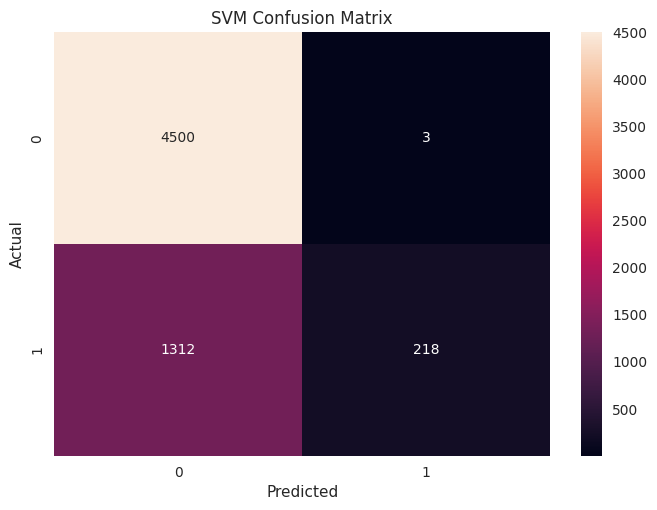

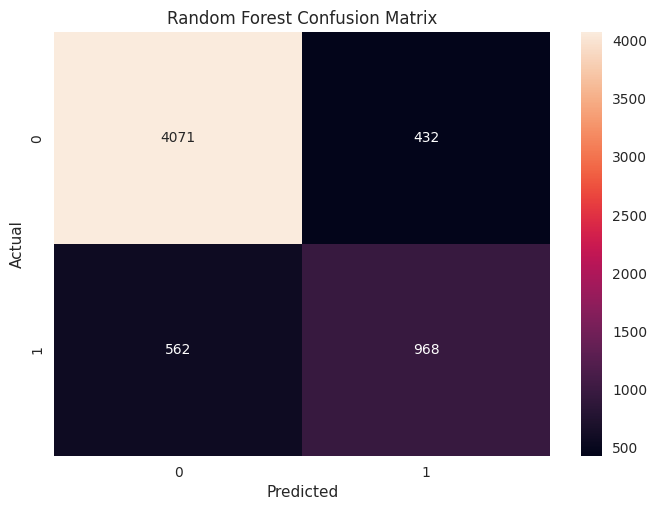

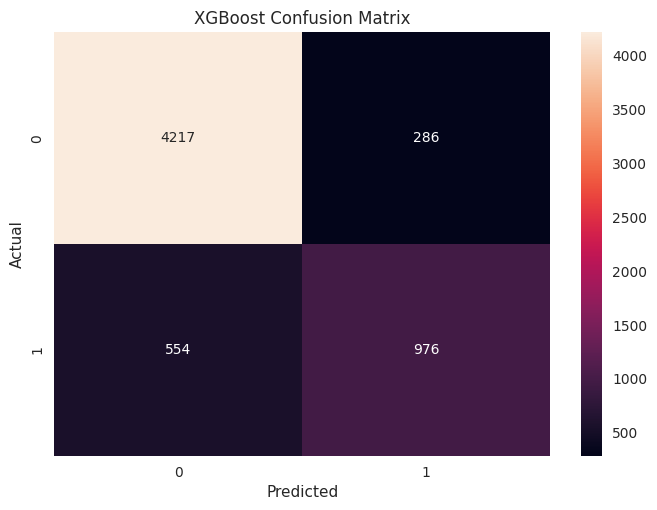

In [346]:
# Create confusion matrices for SVM, Random Forest, and XGBoost predictions
svm_cm = pd.crosstab(y_test, svm_predictions, rownames=['Actual'], colnames=['Predicted'])
rf_cm = pd.crosstab(y_test, rf_predictions, rownames=['Actual'], colnames=['Predicted'])
xgb_cm = pd.crosstab(y_test, xgb_predictions, rownames=['Actual'], colnames=['Predicted'])

# Plot heatmaps for the confusion matrices
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

sns.heatmap(rf_cm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

sns.heatmap(xgb_cm, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Generate AUC curves for each model

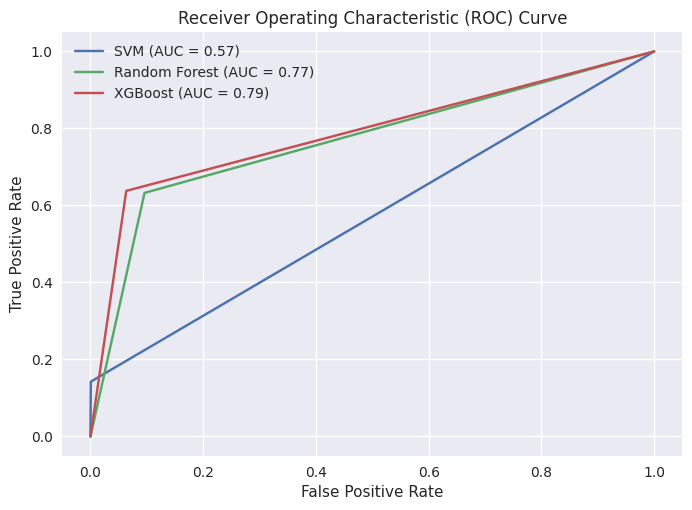

In [347]:
# Calculate false positive rate, true positive rate, and thresholds for each model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_predictions)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_predictions)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_predictions)

# Calculate AUC scores for each model
svm_auc_score = auc(svm_fpr, svm_tpr)
rf_auc_score = auc(rf_fpr, rf_tpr)
xgb_auc_score = auc(xgb_fpr, xgb_tpr)

# Plot the AUC curves
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc_score))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc_score))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc_score))
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [348]:
# Assuming the target variable is stored in a column named 'target'
X = selected_features.values
y = train_dummy['Target'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

In [349]:
# Create an instance of the Random Forest classifier
rf2_classifier = RandomForestClassifier()

# Train the classifier using the scaled training data
rf2_classifier.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = rf2_classifier.predict(X_test_scaled)

In [350]:
# Calculate accuracy and AUC score for Random Forest
rf2_accuracy = accuracy_score(y_test, y_pred)

In [351]:
rf2_accuracy

0.8368970661362506

# Test Preprocessing

In [352]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [353]:
def preprocessing(test, label_encoder):
    # Convert the 'Target' column to numeric labels
    test['Target'] = label_encoder.fit_transform(test['Target'])

    # Create age groups and drop the 'Age' column
    # Handle missing or non-numeric values in the 'Age' column
    test['Age'] = pd.to_numeric(test['Age'], errors='coerce')
    test['age_group'] = pd.cut(test['Age'], bins=[0, 30, 50, float('inf')], labels=['<30', '30-50', '50+'])
    test = test.drop('Age', axis=1)
    # Drop rows with missing values
    test = test.dropna()

    # One-hot encode categorical variables
    test_dummy = pd.get_dummies(test, columns=['Martial_Status', 'Occupation', 'Relationship', 'Workclass', 'Country',
                                               'Race', 'Sex'], drop_first=False)

    # Map education importance and drop 'Education' and 'Education_Importance' columns
    education_importance = {
        'Preschool': 0,
        '1st-4th': 1,
        '5th-6th': 2,
        '7th-8th': 3,
        '9th': 4,
        '10th': 5,
        '11th': 6,
        '12th': 7,
        'HS-grad': 8,
        'Some-college': 9,
        'Assoc-voc': 10,
        'Assoc-acdm': 11,
        'Bachelors': 12,
        'Masters': 13,
        'Prof-school': 14,
        'Doctorate': 15
    }
    test_dummy['Education_Importance'] = test_dummy['Education'].map(education_importance)
    test_dummy = test_dummy.drop(['Education', 'Education_Importance'], axis=1)

    # Map age ranges to labels and drop the 'age_group' column
    age_range_mapping = {
        '<30': 0,
        '30-50': 1,
        '50+': 2
    }
    test_dummy['age_range_encoded'] = test_dummy['age_group'].map(age_range_mapping)
    test_dummy = test_dummy.drop('age_group', axis=1)

    return test_dummy

In [354]:
label_encoder = LabelEncoder()
test_dummy = preprocessing(test, label_encoder)

In [355]:
test_dummy.head()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,Martial_Status_ Married-civ-spouse,Martial_Status_ Married-spouse-absent,...,Country_ Vietnam,Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,age_range_encoded
1,226802.0,7.0,0.0,0.0,40.0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,0
2,89814.0,9.0,0.0,0.0,50.0,0,False,False,True,False,...,False,False,False,False,False,False,True,False,True,1
3,336951.0,12.0,0.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,False,False,True,False,True,0
4,160323.0,10.0,7688.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,True,False,False,False,True,1
6,198693.0,6.0,0.0,0.0,30.0,0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,1


In [356]:
selected_test_features = test_dummy[top_20_features]

In [357]:
X_test = selected_test_features.values
y_test = test_dummy['Target'].values

In [358]:
predictions = xgb_model.predict(X_test)
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8642098273572377


In [359]:
predictions = rf_model.predict(X_test)
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8368525896414343
